In [82]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go


In [83]:
dataset=pd.read_csv("dataset/rsi_macd_SET.csv",index_col='DateTime',parse_dates =['DateTime'],dayfirst=True)

In [84]:
dataset.sample(5)

,macd,rsi,singal,ma_rsi
DateTime,,,,
2012-02-09 00:00:00,21.61,77.30,17.39,72.06
2012-10-15 00:00:00,11.20,56.42,15.47,65.54
2018-06-13 09:00:00,-12.40,38.38,-12.38,39.63
2015-12-22 00:00:00,-33.48,27.81,-28.40,26.68
2019-08-27 00:00:00,-22.86,35.51,-22.39,34.21


In [85]:
dataset.shape

(2630, 4)

In [86]:
dataset.describe()

,macd,rsi,singal,ma_rsi
count,2630.000000,2630.000000,2630.000000,2630.000000
mean,3.442316,54.591551,3.467483,54.619471
std,15.186139,12.860945,13.963341,11.700137
min,-57.140000,15.920000,-47.220000,25.430000
25%,-5.410000,45.660000,-5.087500,46.145000
50%,4.745000,54.150000,4.770000,54.020000
75%,14.727500,64.010000,13.895000,63.007500
max,34.000000,90.310000,30.800000,87.000000


In [87]:
#Sample data from population

x_dataset=dataset['2009':]
x_dataset.shape[0]

2630

In [88]:
x_dataset.head()

,macd,rsi,singal,ma_rsi
DateTime,,,,
2009-01-05,10.58,68.25,4.77,57.13
2009-01-06,12.33,64.98,6.14,57.63
2009-01-07,12.41,59.37,7.28,57.82
2009-01-08,12.51,60.12,8.23,58.69
2009-01-09,11.79,56.88,8.88,58.98


In [89]:
x_dataset.describe()

,macd,rsi,singal,ma_rsi
count,2630.000000,2630.000000,2630.000000,2630.000000
mean,3.442316,54.591551,3.467483,54.619471
std,15.186139,12.860945,13.963341,11.700137
min,-57.140000,15.920000,-47.220000,25.430000
25%,-5.410000,45.660000,-5.087500,46.145000
50%,4.745000,54.150000,4.770000,54.020000
75%,14.727500,64.010000,13.895000,63.007500
max,34.000000,90.310000,30.800000,87.000000


In [90]:
x_dataset.corr(method ='pearson') 

,macd,rsi,singal,ma_rsi
macd,1.000000,0.861964,0.935477,0.931157
rsi,0.861964,1.000000,0.723995,0.851856
singal,0.935477,0.723995,1.000000,0.920270
ma_rsi,0.931157,0.851856,0.920270,1.000000


In [91]:
mar_rsi_sr=x_dataset["ma_rsi"]
macd_sr=x_dataset["macd"]


In [92]:
mar_rsi_sr.corr(macd_sr,method='pearson')


0.9311570440019765

In [93]:
macd_sr.corr(mar_rsi_sr,method='pearson')

0.9311570440019766

# Plot by plotly

In [94]:
fig=px.scatter(x_dataset,x='macd',y='ma_rsi')

fig.show()

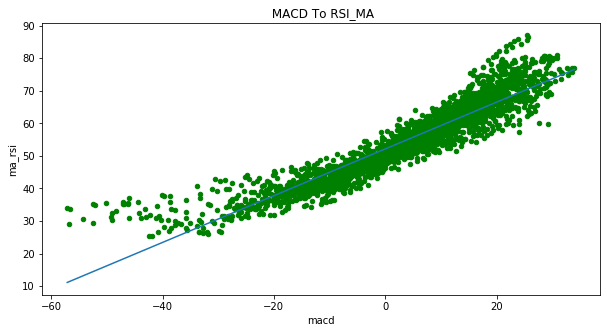

In [95]:
# Create a scatter plot of Study vs Grade
x_dataset.plot(kind='scatter', title=' MACD To RSI_MA', x='macd', y='ma_rsi', color='green',figsize=(10,5))

# Plot the regression line
plt.plot(np.unique(x_dataset['macd']), np.poly1d(np.polyfit(x_dataset['macd'], x_dataset['ma_rsi'], 1))(np.unique(x_dataset['macd'])))
plt.show()

In [96]:
import plotly.figure_factory as ff

x=[x_dataset['macd']]

group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(x, group_labels)

fig.show()

In [97]:
X=x_dataset['macd'].values.reshape(-1,1)
Y=x_dataset['ma_rsi'].values.reshape(-1,1)

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [99]:
myRegessor=LinearRegression()
myRegessor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
#To retrieve the intercept:
print(myRegessor.intercept_)
#For retrieving the slope:
print(myRegessor.coef_)

[52.10383761]
[[0.72187729]]


In [101]:
y_predict=myRegessor.predict(X_test)

In [109]:
df=pd.DataFrame({
'ActualResult':y_test.flatten(),
'PredictedResult':y_predict.flatten()
})
df.sample(10)

,ActualResult,PredictedResult
119,73.29,67.718043
333,45.66,49.331829
589,47.98,50.768365
592,49.17,52.767965
26,76.43,65.920569
544,42.83,34.396188
182,61.74,59.705206
724,50.98,53.511498
56,51.50,50.190863
374,66.85,63.978719


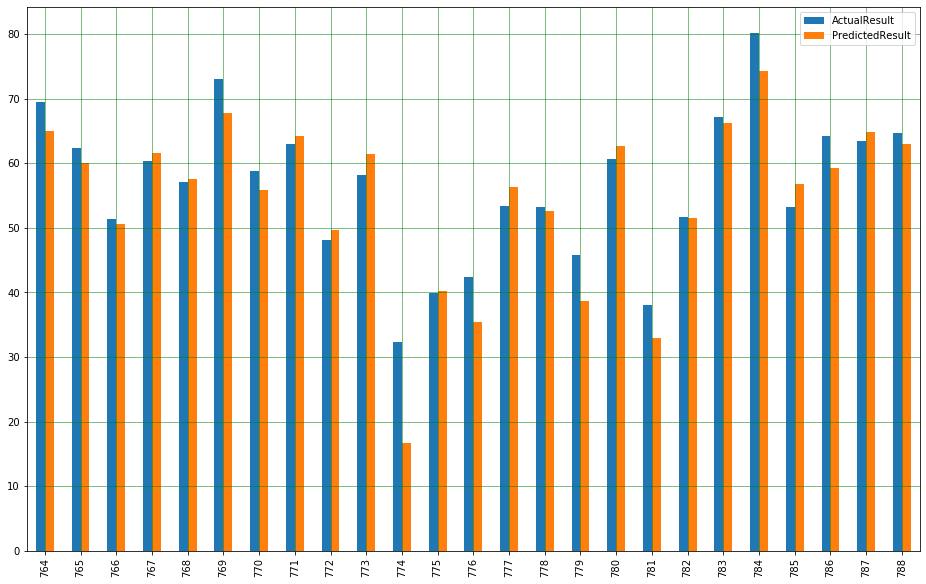

In [116]:
dfSample=df.tail(25)
dfSample.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [117]:


fig = go.Figure()
fig.add_trace(go.Bar(
    x=dfSample.index,
    y=dfSample["ActualResult"],
    name='ActualResult',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=dfSample.index,
    y=dfSample["PredictedResult"],
    name='PredictedResult',
    marker_color='green'
))



In [118]:
print(X_test[:])
print(X_test[:,0])

[[ 2.757e+01]
 [ 1.324e+01]
 [ 1.457e+01]
 [ 1.133e+01]
 [ 8.900e-01]
 [-3.730e+01]
 [ 8.000e-01]
 [ 7.320e+00]
 [-2.225e+01]
 [-2.113e+01]
 [-3.410e+00]
 [-1.831e+01]
 [ 1.442e+01]
 [-2.000e+00]
 [ 1.440e+01]
 [-7.240e+00]
 [ 2.478e+01]
 [-7.300e+00]
 [ 1.117e+01]
 [ 4.700e+00]
 [ 1.657e+01]
 [-1.432e+01]
 [-2.217e+01]
 [ 2.226e+01]
 [-6.730e+00]
 [-4.340e+00]
 [ 1.914e+01]
 [ 8.820e+00]
 [ 2.103e+01]
 [-4.084e+01]
 [ 1.282e+01]
 [ 1.434e+01]
 [ 5.270e+00]
 [ 6.100e-01]
 [ 1.013e+01]
 [ 2.017e+01]
 [-5.800e+00]
 [ 1.620e+00]
 [ 2.204e+01]
 [-8.530e+00]
 [-4.730e+00]
 [ 2.382e+01]
 [ 1.627e+01]
 [-2.082e+01]
 [ 1.728e+01]
 [ 8.060e+00]
 [ 2.058e+01]
 [ 2.162e+01]
 [-2.720e+00]
 [ 1.716e+01]
 [-9.190e+00]
 [ 4.650e+00]
 [ 1.915e+01]
 [ 2.091e+01]
 [ 1.008e+01]
 [-3.500e+01]
 [-2.650e+00]
 [ 2.764e+01]
 [ 1.120e+00]
 [ 1.605e+01]
 [-1.799e+01]
 [ 1.743e+01]
 [-5.000e-02]
 [ 1.178e+01]
 [-6.350e+00]
 [ 1.225e+01]
 [ 1.110e+01]
 [ 3.100e+00]
 [-4.396e+01]
 [-1.383e+01]
 [-1.747e+01]
 [-1.0

In [119]:
test_df=pd.DataFrame( 
{ 
"X_test":X_test[:,0],
"y_test":y_test[:,0]
}
)

test_df
fig=px.scatter(test_df,x='X_test',y='y_test',trendline='lowess')
fig.show()

# The final step is to evaluate the performance of the algorithm. 

This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:

Mean Absolute Error

2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:
Mean Squared Error


3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
Root Mean Squared Error

Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.

Let’s find the values for these metrics using our test data.

In [121]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

print('Mean value of the percentages of all the temperature' , dataset['ma_rsi'].mean())

Mean Absolute Error: 3.2022420588608296
Mean Squared Error: 18.674217378627475
Root Mean Squared Error: 4.321367535702961
Mean value of the percentages of all the temperature 54.61947148288973


# You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.